In [1]:

# 1. 首先加载数据
import tsfresh
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

# 2. 看一下数据的形式
print(timeseries.head())
print(y.head())

# 3. 抽取特征
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id='id', column_sort='time')
print(extracted_features.head())

# 4. 特征过滤
# 由上一步操作得到的特征中存在空值(NaN)，这些没有意义的值需要去掉，选择有用的特征进行保留。从结果可以看出，数据的维度减少了很多。
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)
print(features_filtered.head())

# 5. 特征抽取与过滤同时进行（一步到位，省去多余计算）
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y, column_id='id', column_sort='time')
print(features_filtered_direct.head())

/Users/yaosting/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0
1    True
2    True
3    True
4    True
5    True
dtype: bool


Feature Extraction: 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]


   F_x__variance_larger_than_standard_deviation  F_x__has_duplicate_max  \
1                                           0.0                     0.0   
2                                           0.0                     1.0   
3                                           0.0                     0.0   
4                                           0.0                     1.0   
5                                           0.0                     0.0   

   F_x__has_duplicate_min  F_x__has_duplicate  F_x__sum_values  \
1                     1.0                 1.0            -14.0   
2                     1.0                 1.0            -13.0   
3                     1.0                 1.0            -10.0   
4                     1.0                 1.0             -6.0   
5                     0.0                 1.0             -9.0   

   F_x__abs_energy  F_x__mean_abs_change  F_x__mean_change  \
1             14.0              0.142857          0.000000   
2             25.0          

/Users/yaosting/anaconda3/lib/python3.7/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


   F_x__value_count__value_-1  F_x__abs_energy  \
1                        14.0             14.0   
2                         7.0             25.0   
3                        11.0             12.0   
4                         5.0             16.0   
5                         9.0             17.0   

   F_x__range_count__max_1__min_-1  F_y__abs_energy  T_y__variance  \
1                             15.0             13.0       0.222222   
2                             13.0             76.0       4.222222   
3                             14.0             40.0       3.128889   
4                             10.0             60.0       7.128889   
5                             13.0             46.0       4.160000   

   T_y__standard_deviation  F_x__fft_coefficient__attr_"abs"__coeff_1  \
1                 0.471405                                   1.000000   
2                 2.054805                                   0.624118   
3                 1.768867                                 

Feature Extraction: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]


   F_x__value_count__value_-1  F_x__abs_energy  \
1                        14.0             14.0   
2                         7.0             25.0   
3                        11.0             12.0   
4                         5.0             16.0   
5                         9.0             17.0   

   F_x__range_count__max_1__min_-1  F_y__abs_energy  T_y__variance  \
1                             15.0             13.0       0.222222   
2                             13.0             76.0       4.222222   
3                             14.0             40.0       3.128889   
4                             10.0             60.0       7.128889   
5                             13.0             46.0       4.160000   

   T_y__standard_deviation  F_x__fft_coefficient__attr_"abs"__coeff_1  \
1                 0.471405                                   1.000000   
2                 2.054805                                   0.624118   
3                 1.768867                                 

In [3]:
# 测试线性回归算子
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [34]:
x = timeseries['F_z']
t  =timeseries.copy()
t['fake_index'] = t.index
t

,id,time,F_x,F_y,F_z,T_x,T_y,T_z,fake_index
0,1,0,-1,-1,63,-3,-1,0,0
1,1,1,0,0,62,-3,-1,0,1
2,1,2,-1,-1,61,-3,0,0,2
3,1,3,-1,-1,63,-2,-1,0,3
4,1,4,-1,-1,63,-3,-1,0,4
...,...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5,1315
1316,88,11,-11,2,38,-24,-22,6,1316
1317,88,12,-12,3,23,-24,-24,5,1317
1318,88,13,-13,4,26,-29,-27,5,1318


                            OLS Regression Results                            
Dep. Variable:                    F_z   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           4.25e-44
Time:                        17:16:09   Log-Likelihood:                -9495.7
No. Observations:                1320   AIC:                         1.900e+04
Df Residuals:                    1318   BIC:                         1.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.8123     17.733      5.290      0.0

/Users/yaosting/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yaosting/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


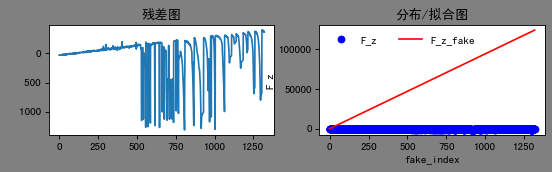

In [33]:
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt  #最常用的绘图库
from scipy import stats          


beef_model = ols("F_z ~ fake_index", data=t).fit() 
print(beef_model.summary())
result = beef_model

resid = result.resid  # 输出残差
print(type(resid))    # <class 'pandas.core.series.Series'>
resid
print(stats.normaltest(result.resid.values)) #对残差进行正态分布检验，p<阀值，拒绝原假设，则是正态分布

figure = plt.figure(num="画布1",figsize=(8,4),dpi=80,facecolor="gray",edgecolor="blue",frameon=True)
axes1=figure.add_subplot(2,2,1)
plt.title("残差图")
axes1.plot(result.resid) #看看残差图

axes2=figure.add_subplot(2,2,2)
plt.title('分布/拟合图')
plt.xlabel('fake_index')
plt.ylabel('F_z')
axes2.plot(t["fake_index"],t["F_z"],'bo',t["fake_index"],result.params[0]*t["fake_index"],'r-')
plt.legend(["F_z","F_z_fake"],loc="best", frameon=False, ncol=2)
plt.show()


In [53]:
# 本身就是要循环一个个attr的字典来获取属性值. 
param = [{'attr': 'slope'},{'attr': 'intercept'}, {'attr': 'rvalue'}]
ae=tsfresh.feature_extraction.feature_calculators.linear_trend(x, param)
ae

[('attr_"slope"', -0.33665917194939543),
 ('attr_"intercept"', 93.81232996123234),
 ('attr_"rvalue"', -0.37003172708033777)]

In [57]:
# 先将数据分组,然后agg计算组内的特征值,然后进行最小二乘计算,当chunk_size=1时,就和linear_trend一致.
param = [{"attr": 'slope', "chunk_len": 1, "f_agg": 'mean'},\
        {"attr": 'intercept', "chunk_len": 1, "f_agg": 'mean'}]
ae=tsfresh.feature_extraction.feature_calculators.agg_linear_trend(x, param)
for value in ae:
    print(value)

('attr_"slope"__chunk_len_1__f_agg_"mean"', -0.33665917194939543)
('attr_"intercept"__chunk_len_1__f_agg_"mean"', 93.81232996123234)


In [73]:
# # linear_trend_timewise  要求的index  也就是x必须是秒级别的datatime,  然后汇总到计算小时单位进行一个回归拟合.
# param = [{'attr': 'slope'},{'attr': 'intercept'}, {'attr': 'rvalue'}]
# ae=tsfresh.feature_extraction.feature_calculators.linear_trend_timewise(x, param)

In [59]:
ae=tsfresh.feature_extraction.feature_calculators.change_quantiles(x,ql=0, qh=1, isabs=False, f_agg='max')
ae

1603

In [72]:
import numpy as np
np.diff(x).max()

1603

In [74]:
ae=tsfresh.feature_extraction.feature_calculators.sum_values(timeseries)
ae

id       58740
time      9240
F_x      -3096
F_y      11766
F_z    -169243
T_x     -51517
T_y      -5963
T_z       1146
dtype: int64

In [76]:
ae=tsfresh.feature_extraction.feature_calculators.sum_of_reoccurring_values([2, 2, 1,3,3]) 
ae

5

In [87]:
param = [{'q':50}]
ae=tsfresh.feature_extraction.feature_calculators.number_cwt_peaks(x, 2)
ae

173

In [90]:
ae=tsfresh.feature_extraction.feature_calculators.quantile(x, 0.1)
ae

-606.8

In [94]:
ae=tsfresh.feature_extraction.feature_calculators.value_count(timeseries, 10)
print(ae)
ae=tsfresh.feature_extraction.feature_calculators.value_count(x, 10)
ae

154


7

In [97]:
ae=tsfresh.feature_extraction.feature_calculators.range_count(x, 10, 15)
ae

17

In [98]:
ae=tsfresh.feature_extraction.feature_calculators.count_above(x, 10)
ae

0.615909090909091